In [39]:
%matplotlib inline

import numpy as np
import collections
from collections import OrderedDict, Counter, defaultdict
import pandas as pd

import Bio
from Bio import SeqIO

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show 
import matplotlib.patches as patches    
from matplotlib import colors


import glob

import subprocess
from subprocess import call

import re

import pickle

from Bio.SubsMat import MatrixInfo
import Bio.Data.CodonTable

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [40]:
# gencode 25 metadata 
metadata_pc_g25 = pd.read_csv('tmp_res/metadata_pc_g25.txt', sep='\t')

# gencode 35 metadata 
metadata_pc_g35 = pd.read_csv('tmp_res/metadata_pc_g35.txt', sep='\t')

# open metadata with scores and metrics and overlaps 
meta = pd.read_csv('tmp_res/local_and_global_df_g25ovlp_g35ovlp_g38ovlp_refseqovlp_strand_FRAMES_PhyloCSF.txt', sep='\t')

In [41]:
PhyloSET = pd.read_csv('tmp_res/SET1.txt', sep='\t')

RiboSET = pd.read_csv('tmp_res/SET2.txt', sep='\t')

In [42]:
PhyloSET[PhyloSET['Proteomics_count_ext'] >0].gene.nunique()

18

In [43]:
PhyloSET[PhyloSET['Proteomics_count_ext'] >0][['gene', 'Proteomics_count_ext']].drop_duplicates().reset_index()

,index,gene,Proteomics_count_ext
0,2,IFFO2,6.285714
1,4,SFPQ,11.538462
2,8,VANGL2,1.125000
3,12,SLC6A1,1.000000
4,14,ADCY5,1.473684
5,15,H1FX,26.206897
6,22,HNRNPA0,30.692308
7,40,PELI2,0.125000
8,42,FEM1B,0.411765
9,48,FXR2,147.864865


In [98]:
TIS_AUG_eff = pd.read_csv('data/TIS_AUG_efficiency.txt', sep='\t', skiprows=1)

TIS_AUG_eff['scaled_efficiency'] = TIS_AUG_eff['efficiency'] / TIS_AUG_eff['efficiency'].max()

print (TIS_AUG_eff.efficiency.max(), TIS_AUG_eff.efficiency.min())


TIS_AUG_eff_dict = dict(zip(TIS_AUG_eff['sequence'], TIS_AUG_eff['efficiency']))


TIS_AUG_eff_dict_scaled = dict(zip(TIS_AUG_eff['sequence'], TIS_AUG_eff['scaled_efficiency']))
                           
TIS_AUG_eff[0:5]

150 12


,sequence,efficiency,lower.bound,upper.bound,scaled_efficiency
0,UUCAUCAUGCA,150,139,161,1.000000
1,GCGAGUAUGGC,149,139,161,0.993333
2,ACGAGAAUGGC,148,136,160,0.986667
3,AUCAUCAUGCA,147,136,158,0.980000
4,ACGAGUAUGGC,145,134,157,0.966667


In [100]:
!ls data/TIS_nonAUG_efficiency.txt

data/TIS_nonAUG_efficiency.txt


In [103]:
TIS_nonAUG_eff = pd.read_csv('data/TIS_nonAUG_efficiency.txt', sep='\t')



SyntaxError: invalid syntax (<ipython-input-103-577d883a2a70>, line 3)

In [44]:
s = 'gene HES3 RERE IFFO2 TAF12 SFPQ OAZ3 OAZ3 OAZ3 VANGL2 NRXN1 C1QL2 MAP3K19 SLC6A1 ZBTB47 ADCY5 H1FX TRPC1 TRPC1 SLC4A4 SLC4A4 MAB21L2 FBXW7 HNRNPA0 MARCKS MAP3K5 POMZP3 POMZP3 SLC35G5 ENY2 C1QL3 C1QL3 NAV2 NAV2 NAV2 NAV2 NAV2 ALDH3B2 ALDH3B2 GLTP MAB21L1 PELI2 PLEKHG3 FEM1B SULT1A1 AC007906.1 MAF MAF GLOD4 FXR2 TNFAIP1 TBC1D29 TBC1D29 TBC1D29 HOXB5 RPTOR RPTOR RPTOR MIB1 SMAD7 CCDC8 CYTH2 CYTH2 CACNG8 ACTL10 DF5OS RIMS4 HELZ2 RANBP1 LRP5L LRP5L LRP5L SOX10 SOX10 KIAA0930 WWC3 USP27 DLG3 DLG3 PABPC1L2B PABPC1L2A UBE2A UBE2A UBE2A UBE2A'

len(set(s))

40

# Original Trips-viz predictions 

In [45]:
transl_with_all_codons = pd.read_csv('data/extensions_TripsViz_1perGene_AUG_NearCognates.txt', sep=',')

transl_with_all_codons.columns = ['gene_ext', 'tr_id1', 'Start_ext', 'Stop_ext', 'len_ext', 
                                 'global_rank_ext', 'type_all_codons', 'trips_viz_link', 'Start_codon_ext', 
                                 'Highframe rank', 'Highframe value',
       'Lowframe rank', 'Lowframe value', 'Stop rank', 'Stop value',
       'Start rank', 'Start value', 'Coverage rank', 'Coverage_value_ext',
       'Amino acid sequence', 'Proteomics_count_ext', 'CDS_ratio']

transl_with_all_codons2 = transl_with_all_codons[['gene_ext', 'tr_id1', 'Start_ext', 'Stop_ext', 
                                                 'global_rank_ext', 'Start_codon_ext', 
                                                 'Proteomics_count_ext', 'Coverage_value_ext', 'CDS_ratio']]

transl_with_all_codons2['Riboseq_Summary'] = transl_with_all_codons2['Start_codon_ext']+'; '+transl_with_all_codons2['Start_ext'].astype(str)+'-'+transl_with_all_codons2['Stop_ext'].astype(str)+'; Rank: '+transl_with_all_codons2['global_rank_ext'].astype(str)+'; cov: '+np.round(transl_with_all_codons2['Coverage_value_ext'],2).astype(str)


transl_with_all_codons2[0:5]

/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gene_ext,tr_id1,Start_ext,Stop_ext,global_rank_ext,Start_codon_ext,Proteomics_count_ext,Coverage_value_ext,CDS_ratio,Riboseq_Summary
0,ASPH,ENST00000379454,144,189,1,CTG,0.0,100.000000,1.645069,CTG; 144-189; Rank: 1; cov: 100.0
1,HSP90AA1,ENST00000216281,168,207,2,GTG,0.0,100.000000,3.081078,GTG; 168-207; Rank: 2; cov: 100.0
2,CD24,ENST00000619133,408,441,3,CTG,0.0,83.333333,11.578498,CTG; 408-441; Rank: 3; cov: 83.33
3,HN1,ENST00000409753,242,287,4,TTG,0.0,100.000000,0.588389,TTG; 242-287; Rank: 4; cov: 100.0
4,YBX1,ENST00000321358,44,140,5,CTG,0.0,85.185185,7.709763,CTG; 44-140; Rank: 5; cov: 85.19


In [46]:
jons = pd.read_csv('data/Jons.txt', sep='\t')

jons_genes = [x.split(' ')[0] for x in jons[(jons['Alla PhyloCSF list?'] == 'no') & (jons['Alla Ribo-seq list?'] == 'no')]['comments'].tolist()]


print (len(jons_genes))

15


In [47]:
for el in jons_genes:
    print (el)

XRRA1
FOXR1
C1QL4
NHLRC4
PHKG2
FBXL19
ABCA10
HELZ2
SOX10
CSDC2
FAM172A
NR2E1
MOB3B
ARID3C
RNF208


In [271]:
PhyloSET[PhyloSET['gene'].isin(jons_genes)]

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type
66,ENST00000467148.1,HELZ2,1,70,23.0,chr20:63572386-63572454,-,chr20:63572386-63572454,834.7283,99,0;0;0,GTG; 5-71; Rank: 1824; cov: 47.06,47.058824,0.391304,"basic,appris_principal_1,CCDS",protein_coding
72,ENST00000396884.6,SOX10,1,283,94.0,chr22:37983785-37983868+chr22:37984339-37984404,-,chr22:37983785-37983868+chr22:37984339-37984536,227.0337,108,0;0;0,ACG; 146-284; Rank: 3286; cov: 17.07,17.073171,0.000000,"alternative_5_UTR,basic,appris_principal_1,CCDS",protein_coding
73,ENST00000360880.6,SOX10,1,265,88.0,chr22:37983785-37983868+chr22:37984339-37984404,-,chr22:37983785-37983868+chr22:37984339-3798444...,227.0337,108,0;0;0,NaN,NaN,NaN,"basic,appris_principal_1,CCDS",protein_coding


In [272]:
RiboSET[RiboSET['gene'].isin(jons_genes)]

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,CDS_ratio


In [48]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


# PLOTS 

In [197]:
def prepare_data_for_trips2(meta, file_counts, metadata_pc_g25, 
                           tr_id, gene, l, p, fraq, cds, 
                           predicted_ext_start=False, figsize=(20, 10),
                           xlims='full', zeros=True, name='test.png', linew=9):
    
    f = pd.read_csv(file_counts)
    f.columns = ['Position', 'Sequence', 'Frame1', 'Frame2', 'Frame3', 'RNASeq']
    
    atgs_pos = {'frame_0':[], 'frame_1':[], 'frame_2':[]}
    stop_pos = {'frame_0':[], 'frame_1':[], 'frame_2':[]}

    for pos in f.Position.tolist():
        codon = ''.join(f.Sequence.tolist()[(pos-1):(pos-1+3)])
        if codon == 'ATG':
            if pos % 3 == 0:
                atgs_pos['frame_0'].append(pos)
            elif pos % 3 == 1:
                atgs_pos['frame_1'].append(pos)
            else:
                atgs_pos['frame_2'].append(pos)
            
        elif (codon == 'TGA') | (codon == 'TAA') | (codon == 'TAG'):
            if pos % 3 == 0:
                stop_pos['frame_0'].append(pos)
            elif pos % 3 == 1:
                stop_pos['frame_1'].append(pos)
            else:
                stop_pos['frame_2'].append(pos)
        else:
            continue     
            
    # add CDS borders
    cds_stop_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_stop_pos
    cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos + 1
    cds_start_codon = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_codon
    
    if xlims == 'ext':
        xlim1 = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1
        xlim2 = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_end1 + 50*3
    elif len(xlims) == 2:
        xlim1 = xlims[0]
        xlim2 = xlims[1]
    else: # full transcript
        xlim1 = 0
        xlim2 = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
    
    d = {}
    
    d['cds_stop_pos'] = cds_stop_pos
    d['cds_start_pos'] = cds_start_pos
    d['cds_start_codon'] = cds_start_codon
    d['f'] = f
    d['stop_pos'] = stop_pos
    d['atgs_pos'] = atgs_pos
    d['xlims'] = (xlim1, xlim2)
    d['predicted_ext_start'] = predicted_ext_start
    d['l'] = l
    d['p'] = p
    d['figsize'] = figsize
    d['fraq'] = fraq
    d['cds'] = cds
    d['name'] = tr_id+'_'+gene
    d['zeros'] = zeros
    d['linew'] = linew
    
    return d


def trips_full2(d, name='test', font1=38, font2=45):
    
    l = d['l']
    p = d['p']
    f = d['f'] # dict with frames 
    atgs_pos = d['atgs_pos']
    stop_pos = d['stop_pos']
    cds_start_pos = d['cds_start_pos']
    cds_stop_pos = d['cds_stop_pos']
    figsize = d['figsize']
    xlims = d['xlims']
    fraq = d['fraq']
    cds = d['cds']
    name = d['name']
    zeros = d['zeros']
    linewidth = d['linew'] 
    
    fig, axes = plt.subplots(5, 1, figsize = figsize, 
                             gridspec_kw={'height_ratios':[10,1.2, 1, 1,1]}, sharex=True, sharey=False)

    main_plot = axes[0]
    #cds = axes[1]
    orfs = axes[1]
    red = axes[2]
    green = axes[3]
    blue = axes[4]

    # x 
    main_plot.set_xlim(f.Position.min(), f.Position.max()+1)

    # y
    
    if xlims is not False:
        f1 = f[xlims[0]:xlims[1]]
        max_height = np.max([np.max(f1.Frame1.tolist()), np.max(f1.Frame2.tolist()), np.max(f1.Frame3.tolist())])
        print (max_height)
    else:
        max_height = np.max([np.max(f.Frame1.tolist()), np.max(f.Frame2.tolist()), np.max(f.Frame3.tolist())])
        print (max_height)
        
    #### ????? why they dissappear????? ######    
    main_plot.set_ylim(0, max_height+max_height/l)
    main_plot.set_yticks(np.arange(0, max_height+max_height/l, p))
    main_plot.set_yticklabels(np.arange(0, max_height+max_height/l, p, dtype=np.int64), fontsize=font1)
    
    # print (f[125:150])

    # #frame 1 = red, frame2 = green, frame3 = blue
    #if zeros == True:
    #    main_plot.plot(f.Frame1.tolist(), color = 'coral', linewidth=linewidth, linestyle='-')
    #    main_plot.plot(f.Frame2.tolist(), color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
    #    main_plot.plot(f.Frame3.tolist(), color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
    
    #else:
    #    # delete zeros 
    #    t = f[['Position', 'Frame1']]
    #    fr1 = t[t['Frame1'] != 0]
    #    
    #    t = f[['Position', 'Frame2']]
    #    fr2 = t[t['Frame2'] != 0]
    #    
    #    t = f[['Position', 'Frame3']]
    #    fr3 = t[t['Frame3'] != 0]
        
    #    main_plot.plot(fr1.Position.tolist(), fr1.Frame1.tolist(), color = 'coral', linewidth=linewidth, linestyle='-')
    #    main_plot.plot(fr2.Position.tolist(), fr2.Frame2.tolist(), color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
    #    main_plot.plot(fr3.Position.tolist(), fr3.Frame3.tolist(), color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
    
    # #frame 1 = red, frame2 = green, frame3 = blue
    if zeros == 'adjust':
        #### ADJUST FRAME 3 #####
        #### each 2nd zero after non-zero value will become 0.1
        trios = [f['Frame3'].tolist()[i:i+3] for i in range(0, len(f['Frame3'].tolist()), 3)]
        for pos, trio in enumerate(trios):
            if len(trio) == 3:
                if (trio[2] != 0) & (trio[2] != 0.1):
                    if pos < len(trios)-3: 
                        trio_next = trios[pos+1]
                        trio_next_next = trios[pos+2]
                        if (trio_next[2] == 0) & (trio_next_next[2] == 0):
                            new_trio = [0, 0, 0.1]
                            new_pos = pos+2
                            trios[pos+2] = new_trio
            
        frame3_new_counts = [item for sublist in trios for item in sublist]
        
        
        #### ADJUST FRAME 2 #####
        #### [0, 1, 0] ######
        trios = [f['Frame2'].tolist()[i:i+3] for i in range(0, len(f['Frame2'].tolist()), 3)]
        for pos, trio in enumerate(trios):
            if len(trio) == 3:
                if (trio[1] != 0) & (trio[1] != 0.1):
                    if pos < len(trios)-3: 
                        trio_next = trios[pos+1]
                        trio_next_next = trios[pos+2]
                        if (trio_next[1] == 0) & (trio_next_next[1] == 0):
                            new_trio = [0, 0.1, 0]
                            new_pos = pos+2
                            trios[pos+2] = new_trio
            
        frame2_new_counts = [item for sublist in trios for item in sublist]
        
        #### ADJUST FRAME 1 #####
        #### [1, 0, 0] ######
        trios = [f['Frame1'].tolist()[i:i+3] for i in range(0, len(f['Frame1'].tolist()), 3)]
        for pos, trio in enumerate(trios):
            if len(trio) == 3:
                if (trio[0] != 0) & (trio[0] != 0.1):
                    if pos < len(trios)-3: 
                        trio_next = trios[pos+1]
                        trio_next_next = trios[pos+2]
                        if (trio_next[0] == 0) & (trio_next_next[0] == 0):
                            new_trio = [0.1, 0, 0]
                            new_pos = pos+2
                            trios[pos+2] = new_trio
            
        frame1_new_counts = [item for sublist in trios for item in sublist]
        
        main_plot.plot(frame1_new_counts, color = 'coral', linewidth=linewidth, linestyle='-')
        main_plot.plot(frame2_new_counts, color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
        main_plot.plot(frame3_new_counts, color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
        
        
    elif zeros == 'adjust2':
        
        #### ADJUST FRAME 3 #####
        #### each 3rd zero after non-zero value will become 0.1
        trios = [f['Frame3'].tolist()[i:i+3] for i in range(0, len(f['Frame3'].tolist()), 3)]
        for pos, trio in enumerate(trios):
            if len(trio) == 3:
                if (trio[2] != 0) & (trio[2] != 0.1):
                    if pos < len(trios)-4: 
                        trio_next = trios[pos+1]
                        trio_next_next = trios[pos+2]
                        trio_next_next_next = trios[pos+3]
                        if (trio_next[2] == 0) & (trio_next_next[2] == 0) & (trio_next_next_next[2] == 0):
                            new_trio = [0, 0, 0.1]
                            new_pos = pos+3
                            trios[pos+3] = new_trio
            
        frame3_new_counts = [item for sublist in trios for item in sublist]
        
        
        #### ADJUST FRAME 2 #####
        #### [0, 1, 0] ######
        trios = [f['Frame2'].tolist()[i:i+3] for i in range(0, len(f['Frame2'].tolist()), 3)]
        for pos, trio in enumerate(trios):
            if len(trio) == 3:
                if (trio[1] != 0) & (trio[1] != 0.1):
                    if pos < len(trios)-4: 
                        trio_next = trios[pos+1]
                        trio_next_next = trios[pos+2]
                        trio_next_next_next = trios[pos+3]
                        if (trio_next[1] == 0) & (trio_next_next[1] == 0) & (trio_next_next_next[1] == 0):
                            new_trio = [0, 0.1, 0]
                            new_pos = pos+3
                            trios[pos+3] = new_trio
            
        frame2_new_counts = [item for sublist in trios for item in sublist]
        
        #### ADJUST FRAME 1 #####
        #### [1, 0, 0] ######
        trios = [f['Frame1'].tolist()[i:i+3] for i in range(0, len(f['Frame1'].tolist()), 3)]
        for pos, trio in enumerate(trios):
            if len(trio) == 3:
                if (trio[0] != 0) & (trio[0] != 0.1):
                    if pos < len(trios)-4: 
                        trio_next = trios[pos+1]
                        trio_next_next = trios[pos+2]
                        trio_next_next_next = trios[pos+3]
                        if (trio_next[0] == 0) & (trio_next_next[0] == 0) & (trio_next_next_next[0] == 0):
                            new_trio = [0.1, 0, 0]
                            new_pos = pos+3
                            trios[pos+3] = new_trio
            
        frame1_new_counts = [item for sublist in trios for item in sublist]
        
        main_plot.plot(frame1_new_counts, color = 'coral', linewidth=linewidth, linestyle='-')
        main_plot.plot(frame2_new_counts, color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
        main_plot.plot(frame3_new_counts, color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
        
    
    elif zeros == True:
        main_plot.plot(f.Frame1.tolist(), color = 'coral', linewidth=linewidth, linestyle='-')
        main_plot.plot(f.Frame2.tolist(), color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
        main_plot.plot(f.Frame3.tolist(), color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
    
    else:
        # delete zeros 
        t = f[['Position', 'Frame1']]
        fr1 = t[t['Frame1'] != 0]
        
        t = f[['Position', 'Frame2']]
        fr2 = t[t['Frame2'] != 0]
        
        t = f[['Position', 'Frame3']]
        fr3 = t[t['Frame3'] != 0]
        
        main_plot.plot(fr1.Position.tolist(), fr1.Frame1.tolist(), color = 'coral', linewidth=linewidth, linestyle='-')
        main_plot.plot(fr2.Position.tolist(), fr2.Frame2.tolist(), color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
        main_plot.plot(fr3.Position.tolist(), fr3.Frame3.tolist(), color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
        
        
        
    red.set_facecolor('coral')
    green.set_facecolor('mediumseagreen')
    blue.set_facecolor('cornflowerblue')
    #cds.set_facecolor('lightgrey')

    #blue.set_xticks(np.arange(0, f.Position.max(), 50))
    #blue.set_xticklabels(np.arange(0, f.Position.max(), 50), fontsize=45)

    red.set_yticklabels(())
    green.set_yticklabels(())
    blue.set_yticklabels(())
    #cds.set_yticklabels(())
    orfs.set_yticklabels(())
    
    

    blue.set_ylabel('f2', fontsize=font1)#, rotation = 0)
    red.set_ylabel('f0', fontsize=font1)#, rotation = 0)
    green.set_ylabel('f1', fontsize=font1)#, rotation = 0)
    #cds.set_ylabel('cds', fontsize=35)#, rotation = 0)
    orfs.set_ylabel('orf', fontsize=font1)#, rotation = 0)

    for frame, pos_li in atgs_pos.items():
        if frame == 'frame_0':
            for pos in pos_li:
                blue.vlines(pos, ymin = 0, ymax = 1, colors='white', linewidth=linewidth-1)
        elif frame == 'frame_1':
            for pos in pos_li:
                red.vlines(pos, ymin = 0, ymax = 1, colors='white', linewidth=linewidth-1)
        else:
            for pos in pos_li:
                green.vlines(pos, ymin = 0, ymax = 1, colors='white', linewidth=linewidth-1)
            
    for frame, pos_li in stop_pos.items():
        if frame == 'frame_0':
            for pos in pos_li:
                blue.vlines(pos, ymin = 0, ymax = 1, colors='black', linewidth=linewidth-1)
        elif frame == 'frame_1':
            for pos in pos_li:
                red.vlines(pos, ymin = 0, ymax = 1, colors='black', linewidth=linewidth-1)
        else:
            for pos in pos_li:
                green.vlines(pos, ymin = 0, ymax = 1, colors='black', linewidth=linewidth-1)
            
                    
    # add start of annotated CDS
    main_plot.vlines(cds_stop_pos, ymin=0, ymax=max_height+max_height/l, colors='black', linewidth=linewidth-2)
    main_plot.vlines(cds_start_pos, ymin=0, ymax=max_height+max_height/l, colors='black', linewidth=linewidth-2)
    #main_plot.text(x = cds_stop_pos-100, y = max_height+max_height/10, s = 'cds stop', fontsize=39)
    #main_plot.text(x = cds_start_pos-10, y = max_height+0.1, s = 'cds start', fontsize=39)


    # add rectangle = CDS
    #if cds is True:
        #rect = patches.Rectangle((cds_start_pos, 0),cds_stop_pos-cds_start_pos,
                         #1,linewidth=1,edgecolor='r',facecolor='lightgrey')
        #cds.add_patch(rect)

        # add non-AUG - cds_start_pos
        #cds.text(x = cds_start_pos, y = 0.3, s = 'AUG', fontsize=38)

    
    # add rectangle = extended CDS
    xlims = d['xlims']
    predicted_ext_start = d['predicted_ext_start']
    if xlims is not False:
        if predicted_ext_start is not False:
            Nst = int(predicted_ext_start.split('_')[0])
            codon_name = predicted_ext_start.split('_')[1]
            N2 = cds_stop_pos
            rect = patches.Rectangle((Nst, 0), N2-Nst,1,linewidth=1,edgecolor='r',facecolor='silver')
            orfs.add_patch(rect)
        
            orfs.text(x = Nst, y = 0.3, s = codon_name, fontsize=font1)

    
    blue.set_xticks(range(f.Position.min(), f.Position.max()+1, fraq))       
    blue.set_xticklabels(range(f.Position.min()-1, f.Position.max(), fraq), fontsize=font1)
    
    print (f.Position.min())
    
    
    if xlims is not False:    
        plt.xlim(xlims[0], xlims[1])

        
        
    main_plot.set_title(name, fontsize=font2)
    plt.subplots_adjust(left=0.1, bottom=0.1,
                    wspace=0.1, hspace=0.1)
    
    #plt.savefig('plots/'+name+'.png', dpi = 300, bbox_inches = 'tight')
    

In [198]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


In [199]:
transl_with_all_codons2[0:2]

,gene_ext,tr_id1,Start_ext,Stop_ext,global_rank_ext,Start_codon_ext,Proteomics_count_ext,Coverage_value_ext,CDS_ratio,Riboseq_Summary
0,ASPH,ENST00000379454,144,189,1,CTG,0.0,100.0,1.645069,CTG; 144-189; Rank: 1; cov: 100.0
1,HSP90AA1,ENST00000216281,168,207,2,GTG,0.0,100.0,3.081078,GTG; 168-207; Rank: 2; cov: 100.0


# XRRA1

254
1


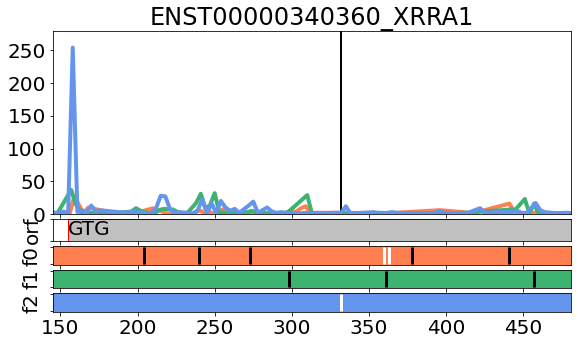

In [249]:
gene = 'XRRA1'

tr_id = 'ENST00000340360'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-10, 
         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =50, 
                             fraq = 50, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'XRRA1.png', font1=20, font2=24)

In [250]:
pre_st

'156_GTG'

In [251]:
tr_id = 'ENST00000340360'

transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

transcript_seq[150:335]

ovlp:  0;0;0


'CCGCAGTGGAGCGGCTCCGAGATCCCCGGGGGGCTCGCAGGCGCGCATCCCTCCTGACTGGGACGTCGCCTCCGCAGACCCCTCGGAGGCTGAAGCGACGCCGGAGGCAGGCAAAGAAACAAGTGAAGAAACAAAAAAAAAAGGAAGTTAAGGGGCCATTCCCAAAGTCAAAGATCAAGGAGATG'

In [252]:
# TIS score 

TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == 'CGCAGUGG'].iloc[0]['TIS Efficiency']

6.1

In [253]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chr11:74940879-74940882+chr11:74945018-74945085+chr11:74948928-74949005',
 '-',
 -783.0201)

##### out-of-frame AUGs or strong CUGs which can capture leaking ribosomes from upstream non-AUG.

In [159]:
def get_ATG_STOP_frames(tr_id):
    # 1 transcript = 1 seq
    # take tr where 5'leader is annoteted = metadat.dropna()
    
    tr_seq = metadata[metadata['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq
    #cds_start = int(metadata[metadata['tr_id'] == tr_id].iloc[0].cds_start_pos)
    #five_leader_seq = metadata[metadata['tr_id'] == tr_id].iloc[0]['5UTR_start_seq']
    
    output_li = []
    
    try:
        # find ATG in 5' leader and its local position in transcript
        # or in all transcript
        matches = re.finditer(r'((CTG).*?)', tr_seq) #five_leader_seq 
        if matches is not None:
            starts = [m.start(0) for m in matches]
            for el in starts:
            
                #subseq = tr_seq[cds_start:] # here is cdsATG.......3' sequence
                subseq2 = tr_seq[el:] # 5'ATG.....cdsATG......3'
            
                # we are searching for 1st in-frame STOP codon 
                matches1 = re.finditer(r'(TAG|TAA|TGA)', subseq2)
            
                # check 3nt step
                if matches1 is not None:
                
                    # CDS frame = ouORF frame => 
                    stop_pos_li = [m.start(1) for m in matches1 if m.start(1) % 3 == 0]
                
                    if stop_pos_li:
                    
                        stop_pos = stop_pos_li[0]
                
                        REAL_start = el
                        REAL_stop = stop_pos+3+el
                
                        # keep all 
                        output_li.append([tr_id, subseq2[:(stop_pos+3)], REAL_start, REAL_stop])
                                    
    except Exception as e:
        print (tr_id, e)

        
    if output_li:
        return output_li
    else:
        return [[tr_id, None, None, None]]

In [172]:
metadata = metadata_pc_g25.copy()

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])

tmp['frame'] = tmp['start'] % 3

print ('frame ext', (int(pos_pred_start)-1) % 3)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > 155)]

frame ext 1


,tr_id,seq,start,stop,frame
4,ENST00000340360,CTGACTGGGACGTCGCCTCCGCAGACCCCTCGGAGGCTGAAGCGAC...,203,2711,2
5,ENST00000340360,CTGGGACGTCGCCTCCGCAGACCCCTCGGAGGCTGA,207,243,0
6,ENST00000340360,CTGAAGCGACGCCGGAGGCAGGCAAAGAAACAAGTGAAGAAACAAA...,239,2711,2


In [161]:
cds_start_pos

332

In [162]:
len(transcript_seq)

5681

In [163]:
transcript_seq[207-4:207+4].replace('T', 'U')

'CUGACUGG'

In [164]:
# TIS score 

TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == 'CCUCCUGC'].iloc[0]['TIS Efficiency']

1.0

In [165]:
transcript_seq[203-4:203+4].replace('T', 'U')

'CCUCCUGA'

In [167]:
TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == 'CCUCCUGA'].iloc[0]['TIS Efficiency']

1.7

In [168]:
TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == transcript_seq[239-4:239+4].replace('T', 'U')].iloc[0]['TIS Efficiency']

2.1

In [107]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


# C1QL4

104
1


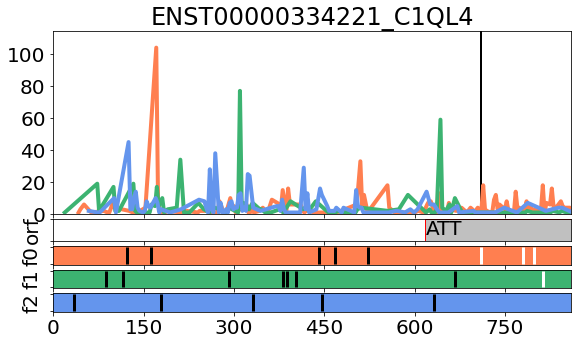

In [129]:
gene = 'C1QL4'

tr_id = 'ENST00000334221'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =20, 
                             fraq = 150, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'C1QL4.png', font1=20, font2=24)

In [131]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

TIS AGCCAUUG 2.6
ovlp:  0;0;0

AGCCATTGCGCCCAAGAGTGAGGAAGATTTGCTGGCCCTGGCAGCGTCGCGGCTGAGCCGCCGCAAGAGGGTGGCGGGCGCGGCCGTCGGAGTGGCCATG


In [206]:
meta[meta['tr_id'].str.contains('ENST00000334221')].iloc[0].global_coo_50_and_less

'chr12:49336478-49336627'

In [207]:
meta[meta['tr_id'].str.contains('ENST00000334221')].iloc[0].strand

'-'

In [209]:
meta[meta['tr_id'].str.contains('ENST00000334221')].iloc[0].PhyloCSF120score

-15.3678

# CSDC2

In [132]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


734
1


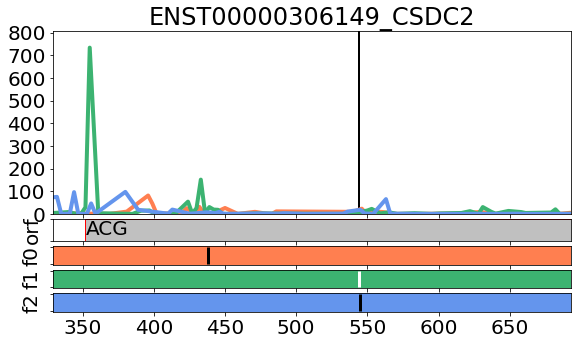

In [254]:
gene = 'CSDC2'

tr_id = 'ENST00000306149'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [330, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =100, 
                             fraq = 50, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'CSDC2.png', font1=20, font2=24)

In [255]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    tis = transcript_seq[coo1:coo2].replace('T', 'U')
    score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS CUCCACGA 2.0
ovlp:  0;0;0

frame ext 1
CTCCACGAGCCAGAGAGAGACAGAGCGCGGACGCCGCAGGAGGCAGTGCCTGGACCCCAGCTGCCCAGGAGAGACGGAGCCCGTGGCTGGTGAGGCCGCAGAGCAGGGCCAGGCCGGGCCCTGCCCGCAAGGACGACCAAACCCCTCACCGGCCCCTGGGCCCCAGAGCCCACCAGGCTCTCCTGCTGGCCCCACCATG


,tr_id,seq,start,stop,frame,tis
13,ENST00000306149,CTGGACCCCAGCTGCCCAGGAGAGACGGAGCCCGTGGCTGGTGAGG...,397,1006,1,1.1
14,ENST00000306149,CTGCCCAGGAGAGACGGAGCCCGTGGCTGGTGA,408,441,0,1.2
15,ENST00000306149,CTGGTGAGGCCGCAGAGCAGGGCCAGGCCGGGCCCTGCCCGCAAGG...,434,548,2,1.9
16,ENST00000306149,CTGCCCGCAAGGACGACCAAACCCCTCACCGGCCCCTGGGCCCCAG...,468,765,0,0.8
17,ENST00000306149,CTGGGCCCCAGAGCCCACCAGGCTCTCCTGCTGGCCCCACCATGA,503,548,2,4.3
18,ENST00000306149,CTGCTGGCCCCACCATGA,530,548,2,0.3
19,ENST00000306149,CTGGCCCCACCATGA,533,548,2,10.6


In [149]:
transcript_seq[404:413].replace('T', 'U')

'CCAGCUGCC'

In [151]:
TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == 'CCAGCUGC'].iloc[0]['TIS Efficiency']

1.2

In [ ]:
metadata = metadata_pc_g25.copy()

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])



tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > 155)]

In [256]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chr22:41561157-41561183+chr22:41571843-41571965', '+', -555.6438)

# USP19

In [186]:
#pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

In [187]:
RiboSET[RiboSET['gene'] == 'USP19']

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,CDS_ratio
72,ENST00000398888.6,USP19,34,319,95.0,chr3:49119146-49119281+chr3:49120756-49120769,-,chr3:49119146-49119281+chr3:49120756-49120904,-322.1883,119,0;0;0,AAG; 227-320; Rank: 236; cov: 61.54,61.538462,0.0,"basic,appris_principal_3,CCDS",protein_coding,1.109651


403
1


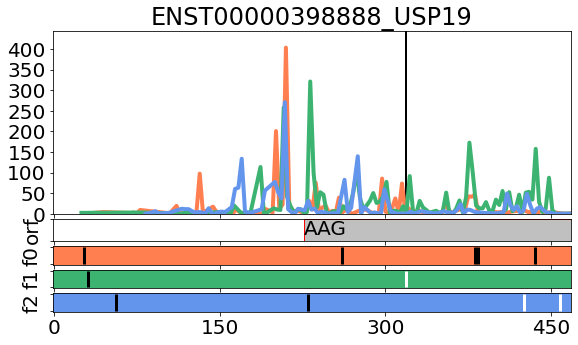

In [189]:
gene = 'USP19'

tr_id = 'ENST00000398888'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =50, 
                             fraq = 150, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'USP19.png', font1=20, font2=24)

In [190]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    tis = transcript_seq[coo1:coo2].replace('T', 'U')
    score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS UGCCAAGA 0.3
ovlp:  0;0;0

frame ext 1
TGCCAAGATAGCTGGGCCAGGAAGAAAGCGCCGCAGCCCTGACCCAGACGCTGTTGCCGACCCCGGGGCACTCTGGCTGTCGACCAAGCGGCTCAAGATG


,tr_id,seq,start,stop,frame,tis
5,ENST00000398888,CTGGGCCAGGAAGAAAGCGCCGCAGCCCTGACCCAGACGCTGTTGC...,233,701,2,4.3
6,ENST00000398888,CTGACCCAGACGCTGTTGCCGACCCCGGGGCACTCTGGCTGTCGAC...,260,701,2,2.3
7,ENST00000398888,CTGTTGCCGACCCCGGGGCACTCTGGCTGTCGACCAAGCGGCTCAA...,272,701,2,3.0
8,ENST00000398888,CTGGCTGTCGACCAAGCGGCTCAAGATGTCTGGCGGGGCCAGTGCC...,294,384,0,29.2
9,ENST00000398888,CTGTCGACCAAGCGGCTCAAGATGTCTGGCGGGGCCAGTGCCACAG...,298,4276,1,2.2


In [ ]:
'CAAGAUAG'

In [191]:
TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == 'CAAGAUAG'].iloc[0]['TIS Efficiency']

4.6

In [ ]:
TIS CAAGAUAG is 4.6

In [211]:
RiboSET[RiboSET['gene'] == 'USP19'].iloc[0].global_coo_50_and_less

'chr3:49119146-49119281+chr3:49120756-49120769'

In [212]:
RiboSET[RiboSET['gene'] == 'USP19'].iloc[0].strand

'-'

# HELZ2

In [192]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


49
1


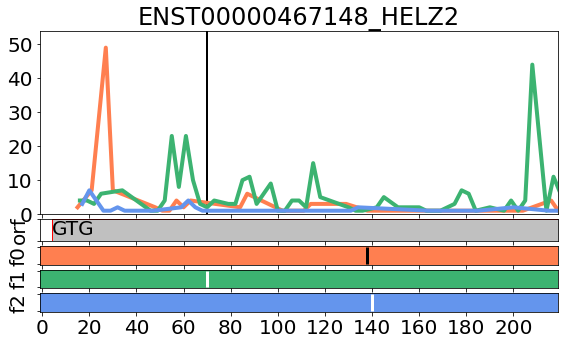

In [216]:
gene = 'HELZ2'

tr_id = 'ENST00000467148'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =10, 
                             fraq = 20, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'HELZ2.png', font1=20, font2=24)

In [213]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    tis = transcript_seq[coo1:coo2].replace('T', 'U')
    score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS GUUUGUGG 0.2
ovlp:  0;0;0

frame ext 1
GTTTGTGGGGCGTGGGCAGCCGTGCTGGCGTGGGGAGTCCCGCTGCCAGTTTGCACACAGCGCCGTGGAGATG


,tr_id,seq,start,stop,frame,tis
0,ENST00000467148,CTGGCGTGGGGAGTCCCGCTGCCAGTTTGCACACAGCGCCGTGGAG...,24,141,0,26.6
1,ENST00000467148,CTGCCAGTTTGCACACAGCGCCGTGGAGATGGCTGTGTGGGAGGCC...,42,141,0,1.1


In [215]:
meta[meta['tr_id'].str.contains('ENST00000467148')].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains('ENST00000467148')].iloc[0].strand, meta[meta['tr_id'].str.contains('ENST00000467148')].iloc[0].PhyloCSF120score

('chr20:63572386-63572454', '-')

834.7283

In [220]:
PhyloSET[PhyloSET['gene'] == 'HELZ2']

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type
66,ENST00000467148.1,HELZ2,1,70,23.0,chr20:63572386-63572454,-,chr20:63572386-63572454,834.7283,99,0;0;0,GTG; 5-71; Rank: 1824; cov: 47.06,47.058824,0.391304,"basic,appris_principal_1,CCDS",protein_coding


# FOXR1

In [221]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


0
1


/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


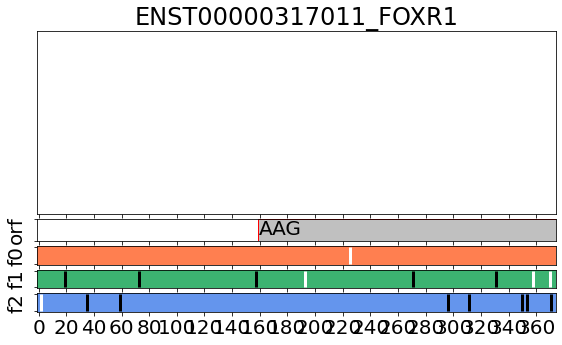

In [222]:
gene = 'FOXR1'

tr_id = 'ENST00000317011'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =10, 
                             fraq = 20, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'FOXR1.png', font1=20, font2=24)

# NHLRC4

28
1


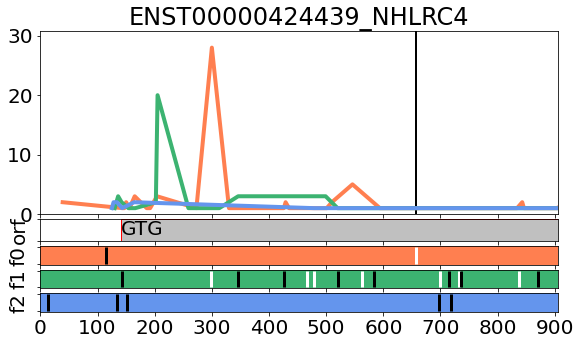

In [225]:
gene = 'NHLRC4'

tr_id = 'ENST00000424439'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =10, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'NHLRC4.png', font1=20, font2=24)

# PHKG2

In [226]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


1010
1


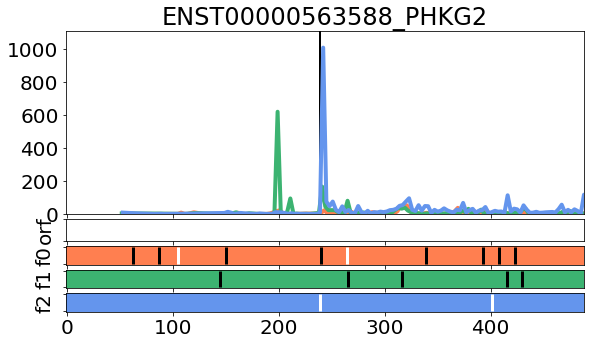

In [229]:
gene = 'PHKG2'

tr_id = 'ENST00000563588'


#pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
#pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


#pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =200, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'PHKG2.png', font1=20, font2=24)

In [ ]:
gene = 'PHKG2'

tr_id = 'ENST00000563588'


#pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
#pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


#pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =200, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'PHKG2.png', font1=20, font2=24)

# FBXL19

In [230]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


75
1


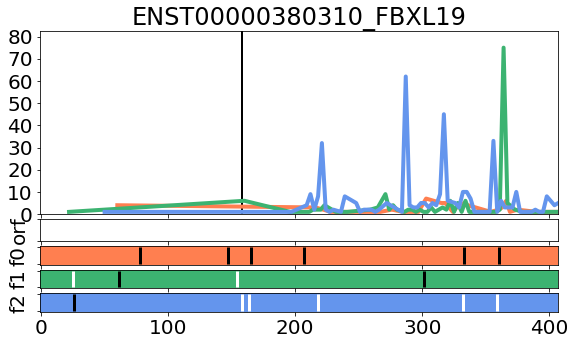

In [232]:
gene = 'FBXL19'

tr_id = 'ENST00000380310'


#pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
#pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


#pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =10, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'FBXL19.png', font1=20, font2=24)

# ABCA10

1
1


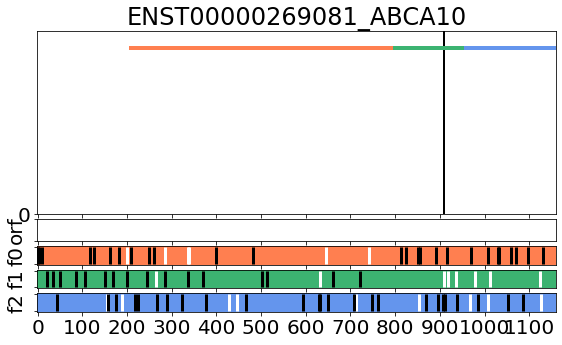

In [233]:
gene = 'ABCA10'

tr_id = 'ENST00000269081'


#pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
#pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


#pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =10, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'ABCA10.png', font1=20, font2=24)

In [ ]:
gene = 'ABCA10'

tr_id = 'ENST00000269081'


#pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
#pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


#pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =10, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'ABCA10.png', font1=20, font2=24)

# SOX10

In [234]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


9
1


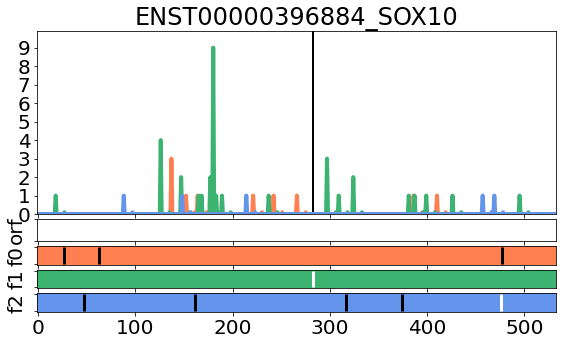

In [237]:
gene = 'SOX10'

tr_id = 'ENST00000396884'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =1, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros='adjust2')

trips_full2(d1, name = 'ABCA10.png', font1=20, font2=24)

In [238]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chr22:37983785-37983868+chr22:37984339-37984404', '-', 227.0337)

In [242]:
PhyloSET[PhyloSET['gene'] == 'SOX10']

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type
72,ENST00000396884.6,SOX10,1,283,94.0,chr22:37983785-37983868+chr22:37984339-37984404,-,chr22:37983785-37983868+chr22:37984339-37984536,227.0337,108,0;0;0,ACG; 146-284; Rank: 3286; cov: 17.07,17.073171,0.0,"alternative_5_UTR,basic,appris_principal_1,CCDS",protein_coding
73,ENST00000360880.6,SOX10,1,265,88.0,chr22:37983785-37983868+chr22:37984339-37984404,-,chr22:37983785-37983868+chr22:37984339-3798444...,227.0337,108,0;0;0,NaN,NaN,NaN,"basic,appris_principal_1,CCDS",protein_coding


In [240]:
tmp

,tr_id,seq,start,stop,frame
0,ENST00000396884,CTGTCCGGCCAGGGTGGTTGGTGGTAA,3,30,0
1,ENST00000396884,CTGAGGCTCAGGGCCCCCCGCCCCTCCCTCCCAGCCCACCAGCGTC...,62,164,2
2,ENST00000396884,CTGGACCGCACACCTTGGGACACGGTTTTCCACTTCCTAAGGACGA...,124,1684,1
3,ENST00000396884,CTGGAGGAGAGGTCCGAGGAGGTGGGCGTTGGACTCTTTGCGAGGA...,178,1684,1
4,ENST00000396884,CTGGCCCGGGGGAGGCGGCCGAGGCGGCGGCGGCGGCGGCCGGGGG...,233,320,2
...,...,...,...,...,...
70,ENST00000396884,CTGTTCTGCAGCCCCCCAAATCCACATGTAACTCATTACTGTCTCC...,2726,2822,2
71,ENST00000396884,CTGCAGCCCCCCAAATCCACATGTAACTCATTACTGTCTCCTGTTA...,2731,2803,1
72,ENST00000396884,CTGTCTCCTGTTATTTATCTCAGTAGTCCCCTCTCCTAG,2764,2803,1
73,ENST00000396884,CTGTTATTTATCTCAGTAGTCCCCTCTCCTAGCCACTCTAGCCCCT...,2771,2822,2


In [241]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    try:
        tis = transcript_seq[coo1:coo2].replace('T', 'U')
        score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    except:
        tis = None
        score = None
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS GGACACGG 3.3
ovlp:  0;0;0

frame ext 1
GGACACGGTTTTCCACTTCCTAAGGACGAGCCCCAGACTGGAGGAGAGGTCCGAGGAGGTGGGCGTTGGACTCTTTGCGAGGACCCCGGCGGCTGGCCCGGGGGAGGCGGCCGAGGCGGCGGCGGCGGCGGCCGGGGGCGACATG


,tr_id,seq,start,stop,frame,tis
3,ENST00000396884,CTGGAGGAGAGGTCCGAGGAGGTGGGCGTTGGACTCTTTGCGAGGA...,178,1684,1,26.2
4,ENST00000396884,CTGGCCCGGGGGAGGCGGCCGAGGCGGCGGCGGCGGCGGCCGGGGG...,233,320,2,3.5


# FAM172A

In [243]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


In [ ]:
gene = 'FAM172A'

tr_id = 'ENST00000396884'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =1, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros='adjust2')

trips_full2(d1, name = 'FAM172A.png', font1=20, font2=24)

# NR2E1

In [245]:
pd.DataFrame(jons_genes, columns =['gene_ext']).merge(transl_with_all_codons2, on='gene_ext', how='left')[['gene_ext', 'tr_id1', 'Riboseq_Summary', 'Proteomics_count_ext']]

,gene_ext,tr_id1,Riboseq_Summary,Proteomics_count_ext
0,XRRA1,ENST00000340360,GTG; 156-333; Rank: 711; cov: 46.3,0.000000
1,FOXR1,ENST00000317011,AAG; 160-226; Rank: 6307; cov: 0.0,0.000000
2,C1QL4,ENST00000334221,ATT; 619-712; Rank: 1762; cov: 42.31,2.000000
3,NHLRC4,ENST00000424439,GTG; 142-658; Rank: 3252; cov: 16.17,0.000000
4,PHKG2,ENST00000563588,NaN,0.000000
5,FBXL19,ENST00000380310,TTG; 78-159; Rank: 5974; cov: 0.0,0.000000
6,ABCA10,ENST00000269081,ATC; 779-911; Rank: 4729; cov: 2.56,0.000000
7,HELZ2,ENST00000467148,GTG; 5-71; Rank: 1824; cov: 47.06,0.391304
8,SOX10,ENST00000396884,ACG; 146-284; Rank: 3286; cov: 17.07,0.000000
9,CSDC2,ENST00000306149,ACG; 353-545; Rank: 678; cov: 33.9,0.000000


15
1


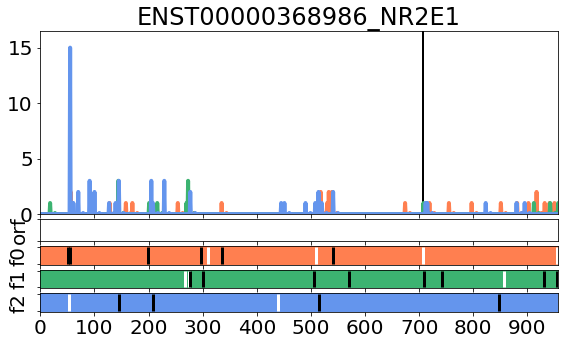

In [258]:
gene = 'NR2E1'

tr_id = 'ENST00000368986'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =5, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros='adjust2')

trips_full2(d1, name = 'NR2E1.png', font1=20, font2=24)

In [248]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chr6:108166616-108166765', '+', -376.1303)

# MOB3B

281
1


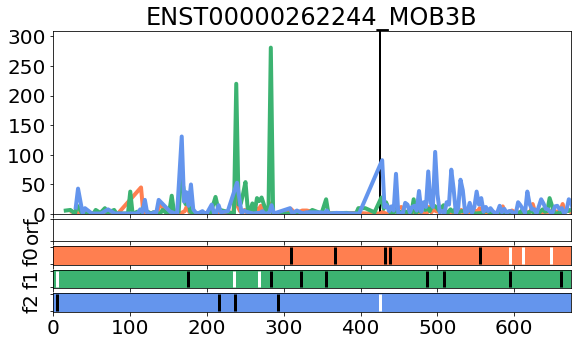

In [266]:
gene = 'MOB3B'

tr_id = 'ENST00000262244'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =50, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'MOB3B.png', font1=20, font2=24)

# ARID3C

4
1


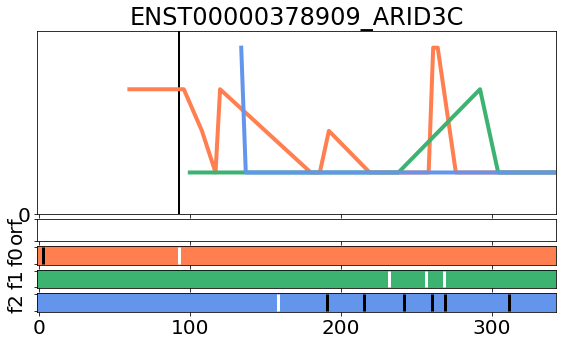

In [269]:
gene = 'ARID3C'

tr_id = 'ENST00000378909'


#pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
#pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


#pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =50, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'ARID3C.png', font1=20, font2=24)

# RNF208

31
1


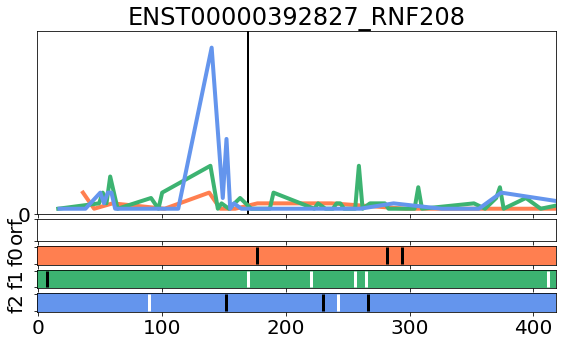

In [270]:
gene = 'RNF208'

tr_id = 'ENST00000392827'


#pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
#pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*5]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=False, 
                            l=10, 
                            p =50, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'RNF208.png', font1=20, font2=24)

# MAB21L1

In [273]:
RiboSET[RiboSET['gene'] == 'MAB21L1']

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,CDS_ratio


In [274]:
PhyloSET[PhyloSET['gene'] == 'MAB21L1']

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type
39,ENST00000379919.5,MAB21L1,963,1071,36.0,chr13:35476139-35476246,-,chr13:35476139-35476246,228.2748,120,0;0;0,TTG; 991-1072; Rank: 1950; cov: 40.91,40.909091,0.0,"basic,appris_principal_1,CCDS",protein_coding


10
1


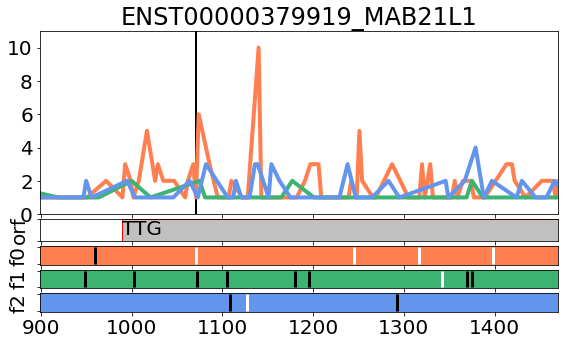

In [282]:
gene = 'MAB21L1'

tr_id = 'ENST00000379919'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-170, 
#         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [900, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*8]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =2, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'MAB21L1.png', font1=20, font2=24)

In [283]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chr13:35476139-35476246', '-', 228.2748)

In [284]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    try:
        tis = transcript_seq[coo1:coo2].replace('T', 'U')
        score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    except:
        tis = None
        score = None
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS GAAGUUGG 2.3
ovlp:  0;0;0

frame ext 0
GAAGTTGGCTCCAGCTCTAGCAGCCGCATTGGATCCCACAGCTTACTGCGAGACTCCGGTGTACAATCCGGATCTCTGCCCCAACATG


,tr_id,seq,start,stop,frame,tis
20,ENST00000379919,CTGCGAGACTCCGGTGTACAATCCGGATCTCTGCCCCAACATGATT...,1031,1112,2,1.3
21,ENST00000379919,CTGCCCCAACATGATTGCGGCCCAGGCCAAGCTGGTCTACCATCTG...,1061,1112,2,0.6


# SNRNP25

In [286]:
RiboSET[RiboSET['gene'] == 'SNRNP25']

# SNRNP25 (RiboSET), Trips-viz start is CTG with rank 99. 

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,CDS_ratio
264,ENST00000383018.7,SNRNP25,2,161,53.0,chr16:53840-53989,+,chr16:53831-53989,-749.1911,111,0;0;0,CTG; 78-162; Rank: 99; cov: 91.3,91.304348,0.0,"basic,appris_principal_2,CCDS",protein_coding,3.097772


In [290]:
f = pd.read_csv('data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene))
f['Frame 1'].sum()

5661

955
1


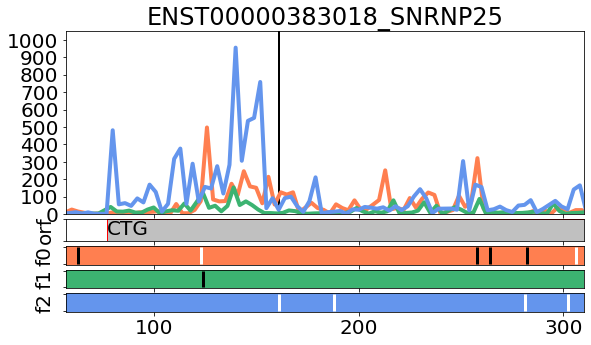

In [293]:
gene = 'SNRNP25'

tr_id = 'ENST00000383018'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-20, 
         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

#xlims = [900, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*8]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =100, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'SNRNP25.png', font1=20, font2=24)

In [294]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    try:
        tis = transcript_seq[coo1:coo2].replace('T', 'U')
        score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    except:
        tis = None
        score = None
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS GGCCCUGG 20.3
ovlp:  0;0;0

frame ext 2
GGCCCTGGAGGAGACGGAGGCCGCGGGTGGGCCCGAGGCGCAAGAGGAAGATGAGGACGAAGAAGAGGCGCTGCCGCACTCCGAGGCCATG


,tr_id,seq,start,stop,frame,tis
4,ENST00000383018,CTGCCGCACTCCGAGGCCATGGACGTGTTCCAGGAGGGTCTGGCTA...,143,560,2,1.1


# FXR2

In [295]:
RiboSET[RiboSET['gene'] == 'FXR2']

# FXR2 (RiboSET and PhyloSET), GTG with Rank: 110

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,CDS_ratio
297,ENST00000250113.11,FXR2,2,335,111.0,chr17:7614533-7614682,-,chr17:7614533-7614865,489.2998,97,0;0;0,GTG; 117-336; Rank: 110; cov: 70.59,70.588235,147.864865,"basic,appris_principal_1,CCDS",protein_coding,0.331728


678
1


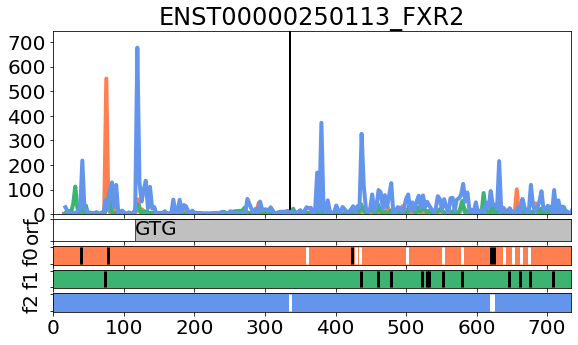

In [301]:
gene = 'FXR2'

tr_id = 'ENST00000250113'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-90, 
         #metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*8]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =100, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'FXR2.png', font1=20, font2=24)

In [302]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    try:
        tis = transcript_seq[coo1:coo2].replace('T', 'U')
        score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    except:
        tis = None
        score = None
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS CACGGUGG 12.9
ovlp:  0;0;0

frame ext 2
CACGGTGGCGGAGACCAAGGCGGCGGCGGCGGACGGGGAGCGGCCCGGCCCCGGCCCCCTGCTCGTTGGCTGTGGCAGGGCCGCCGTGGGGCCGGCCCGGCTCCCGCCCCCCGCGGCTCCCCCTCCGGCTCCTCCTCCGGGGAGACGCCGGGGGCCTGGCCCGGCCCGCACTCAGACTGCTGCTGCAGCCGCCGCCGGGGGAGTCGGAGGCGGTGGCGGCGCCATG


,tr_id,seq,start,stop,frame,tis
3,ENST00000250113,CTGCTCGTTGGCTGTGGCAGGGCCGCCGTGGGGCCGGCCCGGCTCC...,170,2357,2,0.8
4,ENST00000250113,CTGTGGCAGGGCCGCCGTGGGGCCGGCCCGGCTCCCGCCCCCCGCG...,181,439,1,0.3
5,ENST00000250113,CTGGCCCGGCCCGCACTCAGACTGCTGCTGCAGCCGCCGCCGGGGG...,267,426,0,10.7
6,ENST00000250113,CTGCTGCTGCAGCCGCCGCCGGGGGAGTCGGAGGCGGTGGCGGCGC...,288,426,0,3.4
7,ENST00000250113,CTGCTGCAGCCGCCGCCGGGGGAGTCGGAGGCGGTGGCGGCGCCAT...,291,426,0,0.6
8,ENST00000250113,CTGCAGCCGCCGCCGGGGGAGTCGGAGGCGGTGGCGGCGCCATGGG...,294,426,0,0.3


# MAP3K5

In [323]:
PhyloSET[PhyloSET['gene'] == 'MAP3K5']

# MAP3K5 (PhyloSET), CTG with Rank: 1113,

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type
24,ENST00000359015.4,MAP3K5,121,361,80.0,chr6:136792158-136792307,-,chr6:136792158-136792397,305.6564,87,0;0;0,CTG; 125-362; Rank: 1113; cov: 51.35,51.351351,0.0,"basic,appris_principal_1,CCDS",protein_coding


82
1


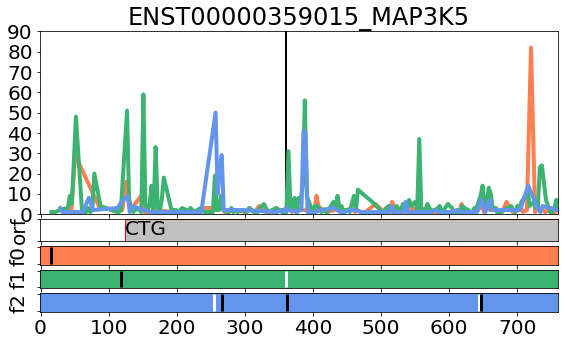

In [324]:
gene = 'MAP3K5'

tr_id = 'ENST00000359015'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-90, 
         #metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*8]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =10, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'MAP3K5.png', font1=20, font2=24)

In [325]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chr6:136792158-136792307', '-', 305.6564)

In [327]:
tr_id


'ENST00000359015'

In [326]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-7:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    try:
        tis = transcript_seq[coo1:coo2].replace('T', 'U')
        score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    except:
        tis = None
        score = None
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS AACUCUGC 1.2
ovlp:  0;0;0

frame ext 1
TAAACTCTGCAGAGGGCGAGCGGCGCGGCCACGGAGGCGCCGAGGAGGAGCGAGCCGCCGCCGGGCAGCGGCGTGCCCTCGGGGGAGAGGGCGCCGGAGAGGAGGCGGCGGCGCGGCGGCGAGGGCGCGGCGCGCGATGGCAGCTGCTTAGCCCGGCGGGCGCGGAGCAGCCCCGAGCTGTGGCTGGCCAGGCGGTGCGGCTGGGCGGGGGACGCCGCCGCCGTTGCTGCCCGGCCCGGAGAGATG


,tr_id,seq,start,stop,frame,tis
2,ENST00000359015,CTGCTTAGCCCGGCGGGCGCGGAGCAGCCCCGAGCTGTGGCTGGCC...,261,918,0,0.4
3,ENST00000359015,CTGTGGCTGGCCAGGCGGTGCGGCTGGGCGGGGGACGCCGCCGCCG...,295,4486,1,5.1
4,ENST00000359015,CTGGCCAGGCGGTGCGGCTGGGCGGGGGACGCCGCCGCCGTTGCTG...,301,4486,1,1.9
5,ENST00000359015,CTGGGCGGGGGACGCCGCCGCCGTTGCTGCCCGGCCCGGAGAGATG...,318,918,0,3.5
6,ENST00000359015,CTGCCCGGCCCGGAGAGATGA,344,365,2,0.5


In [308]:
TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == 'GGCCACGG'].iloc[0]['TIS Efficiency']

4.2

# WWC3

In [309]:
PhyloSET[PhyloSET['gene'] == 'WWC3']

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type
75,ENST00000380861.8,WWC3,1,391,130.0,chrX:10015803-10015858+chrX:10063445-10063538,+,chrX:10015563-10015858+chrX:10063445-10063538,918.1683,117,0;0;0,CTG; 200-392; Rank: 766; cov: 66.1,66.101695,31.9,"basic,appris_principal_1,CCDS",protein_coding


46
1


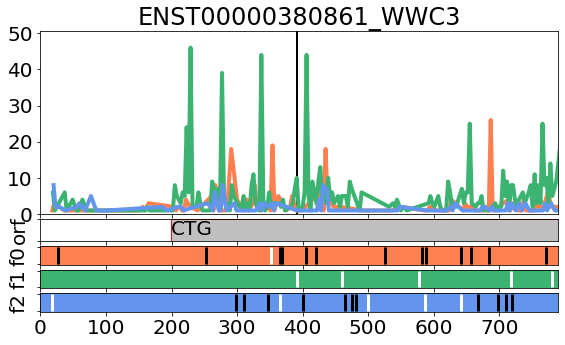

In [328]:
gene = 'WWC3'

tr_id = 'ENST00000380861'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-90, 
         #metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*8]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =10, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'WWC3.png', font1=20, font2=24)

In [329]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    try:
        tis = transcript_seq[coo1:coo2].replace('T', 'U')
        score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    except:
        tis = None
        score = None
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS GCCGCUGC 0.4
ovlp:  0;0;0

frame ext 1
GCCGCTGCCCGCCGGCTGGGAGGAGGCGCGAGACTACGACGGTCGCGTCTTTTACATTGACCACAACACGCGCCAGACGTCGTGGATCGACCCCCGCGACCGGATAACAAAGCCATTGACCTTTGCCGATTGTGTTGGGGACGAACTTCCTTTAGGATGGGAAACCGTATATGATAAACAAATTGGAGTTTATTACATG


,tr_id,seq,start,stop,frame,tis
4,ENST00000380861,CTGGGAGGAGGCGCGAGACTACGACGGTCGCGTCTTTTACATTGA,210,255,0,8.9


In [330]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chrX:10015803-10015858+chrX:10063445-10063538', '+', 918.1683)

In [331]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0]

('chrX:10015803-10015858+chrX:10063445-10063538',
 tr_id                                                                          ENST00000380861.8
 N_term_start                                                                                   0
 N_term_end                                                                                   391
 len                                                                                          391
 N_term_start1                                                                                  1
 N_term_end1                                                                                  391
 len_codons                                                                                 130.0
 gene                                                                                        WWC3
 50len_flag                                                                                   241
 global_coo_50_and_less                             chrX:10015803-10

# PIM2

In [313]:
RiboSET[RiboSET['gene'] == 'PIM2']


# PIM2 (RiboSET), ranked 299 with UUG, TIS AGCAUUGG is 2.2

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,CDS_ratio
382,ENST00000376509.4,PIM2,1,190,63.0,chrX:48918835-48918984,-,chrX:48918835-48919023,-255.099,108,0;0;0,TTG; 8-191; Rank: 299; cov: 69.64,69.642857,1.714286,"basic,appris_principal_1,CCDS",protein_coding,0.484519


239
1


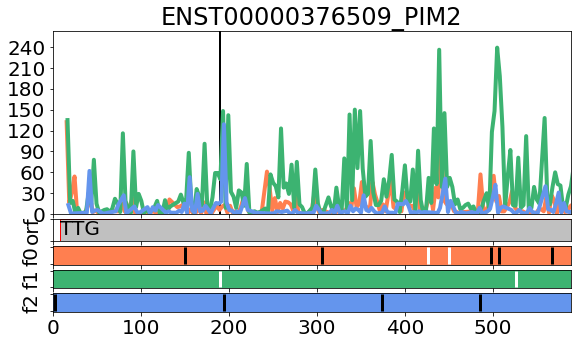

In [332]:
gene = 'PIM2'

tr_id = 'ENST00000376509'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-90, 
         #metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*8]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =30, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'PIM2.png', font1=20, font2=24)

In [333]:
transcript_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq

cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos

tis = transcript_seq[int(pos_pred_start)-5:int(pos_pred_start)+3].replace('T', 'U')

score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']

print ('TIS', tis, score)

print ('ovlp: ', meta[meta['tr_id'].str.contains(tr_id)].iloc[0]['ovlp'])

print ()


print ('frame ext', (int(pos_pred_start)-1) % 3)

print (transcript_seq[int(pos_pred_start)-5:cds_start_pos+3])

tmp = pd.DataFrame(get_ATG_STOP_frames(tr_id), columns = ['tr_id', 'seq', 'start', 'stop'])


tmp['frame'] = tmp['start'] % 3

def tis_score(x):
    start = x['start']
    coo1 = start-4
    coo2 = start+4
    
    try:
        tis = transcript_seq[coo1:coo2].replace('T', 'U')
        score = TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == tis].iloc[0]['TIS Efficiency']
    except:
        tis = None
        score = None
    
    return score

tmp['tis'] = tmp.apply(tis_score, axis=1)

tmp[(tmp['start'] < cds_start_pos) & (tmp['start'] > int(pos_pred_start)-1)]

TIS AGCAUUGG 2.2
ovlp:  0;0;0

frame ext 1
AGCATTGGGGCTGGCGCGCGCGGCGAATCTCAACGCTGCGCCGTCTGCGGGCGCTTCCGGGCCACCAGTTTCTCTGCTTTCCACCCTGGCGCCCCCCAGCCCTGGCTCCCCAGCTGCGCTGCCCCGGGCGTCCACGCCCTGCGGGCTTAGCGGGTTCAGTGGGCTCAATCTGCGCAGCGCCACCTCCATG


,tr_id,seq,start,stop,frame,tis
0,ENST00000376509,CTGGCGCGCGCGGCGAATCTCAACGCTGCGCCGTCTGCGGGCGCTT...,13,1126,1,14.1
1,ENST00000376509,CTGCGCCGTCTGCGGGCGCTTCCGGGCCACCAGTTTCTCTGCTTTC...,38,197,2,2.5
2,ENST00000376509,CTGCGGGCGCTTCCGGGCCACCAGTTTCTCTGCTTTCCACCCTGGC...,47,197,2,0.7
3,ENST00000376509,CTGCTTTCCACCCTGGCGCCCCCCAGCCCTGGCTCCCCAGCTGCGC...,76,1126,1,0.3
4,ENST00000376509,CTGGCGCCCCCCAGCCCTGGCTCCCCAGCTGCGCTGCCCCGGGCGT...,88,1126,1,42.2
5,ENST00000376509,CTGGCTCCCCAGCTGCGCTGCCCCGGGCGTCCACGCCCTGCGGGCT...,104,197,2,33.0
6,ENST00000376509,CTGCGCTGCCCCGGGCGTCCACGCCCTGCGGGCTTAGCGGGTTCAG...,116,197,2,1.2
7,ENST00000376509,CTGCCCCGGGCGTCCACGCCCTGCGGGCTTAGCGGGTTCAGTGGGC...,121,1126,1,1.0
8,ENST00000376509,CTGCGGGCTTAG,141,153,0,2.3
9,ENST00000376509,CTGCGCAGCGCCACCTCCATGTTGACCAAGCCTCTACAGGGGCCTC...,172,1126,1,2.3


In [334]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_50_and_less, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].strand, meta[meta['tr_id'].str.contains(tr_id)].iloc[0].PhyloCSF120score

('chrX:48918835-48918984', '-', -255.099)

In [337]:
meta[meta['tr_id'].str.contains(tr_id)].iloc[0].global_coo_primary

'chrX:48918835-48919023'

In [338]:
TIS_nonAUG_eff[TIS_nonAUG_eff['TIS Sequence'] == 'GGGGCUGG'].iloc[0]['TIS Efficiency']

14.1

In [ ]:
TIS GGGGCUGG 14.1

# DLG3

In [319]:
PhyloSET[PhyloSET['gene'] == 'DLG3']

# DLG3 (PhyloSET), ranked 4589 with GUG 

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type
77,ENST00000194900.8,DLG3,41,341,100.0,chrX:70445052-70445201,+,chrX:70444902-70445201,431.1152,95,0;0;0,NaN,NaN,NaN,"basic,appris_alternative_2",protein_coding
78,ENST00000374360.7,DLG3,2,233,77.0,chrX:70445052-70445201,+,chrX:70444971-70445201,431.1152,95,0;0;0,GTG; 99-234; Rank: 4589; cov: 5.0,5.0,0.0,"basic,appris_principal_2,CCDS",protein_coding


14
1


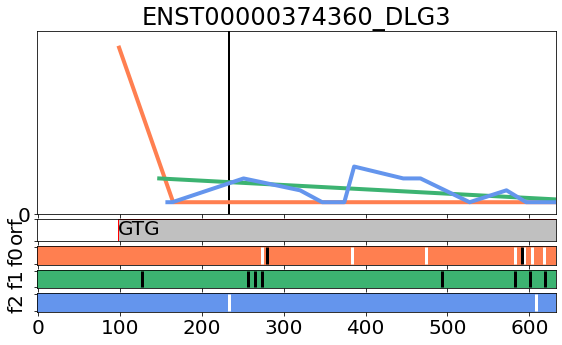

In [320]:
gene = 'DLG3'

tr_id = 'ENST00000374360'


pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

#xlims = [transl_with_all_codons2[transl_with_all_codons2['tr_id1'].str.contains(tr_id)].iloc[0].Start_ext-90, 
         #metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

xlims = [0, metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*8]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/13studies/profiles_by_reading_frame/%s_%s_unamb.csv' % (tr_id, gene), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =30, 
                             fraq = 100, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'DLG3.png', font1=20, font2=24)